In [ ]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=94b61c8d809fd9d2af617574f3cb43deacdc15978be6dd3fbdec092b4fdbad3c
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [ ]:
import pandas as pd
import arff
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from google.colab import driv
from sklearn.model_selection import KFold, ParameterGrid
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.stats import wilcoxon
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ParameterGrid,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


In [ ]:
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/TrabalhoAprendizado'

Mounted at /content/drive
/content/drive/MyDrive/TrabalhoAprendizado


In [ ]:
arquivo_data = '/content/drive/MyDrive/TrabalhoAprendizado/Dry_Bean_Dataset.arff'
data = arff.load(open(arquivo_data, 'r'))
df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])

print(df.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [ ]:
df["Class"].value_counts()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1928
CALI,1630
BARBUNYA,1322
BOMBAY,522


<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


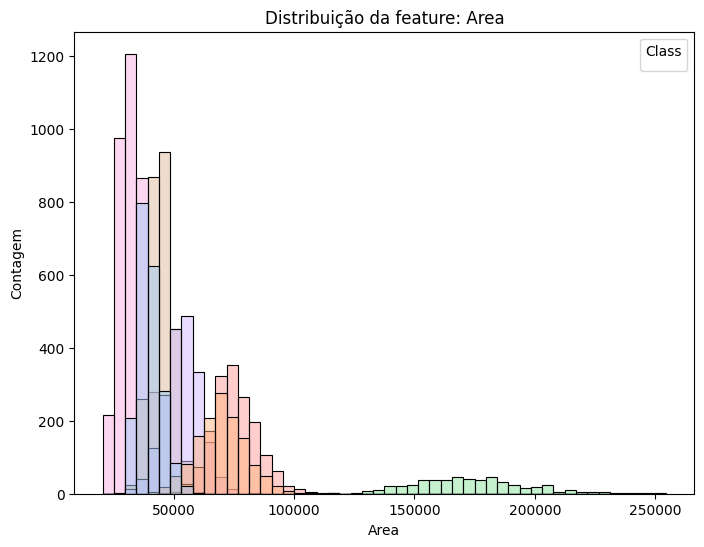

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


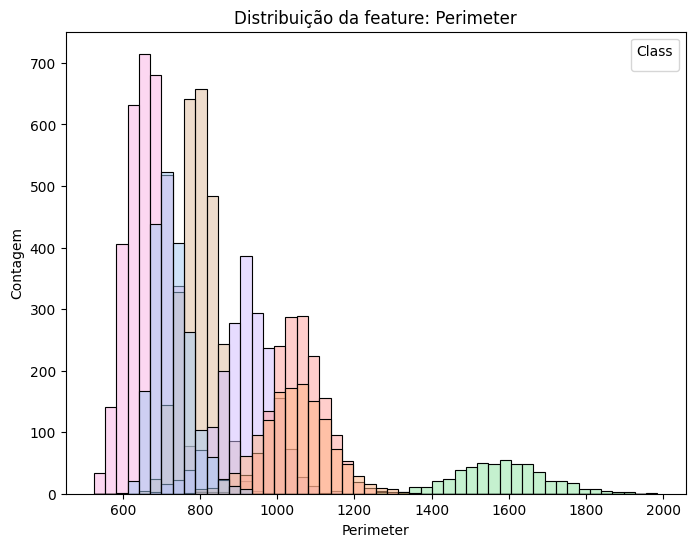

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


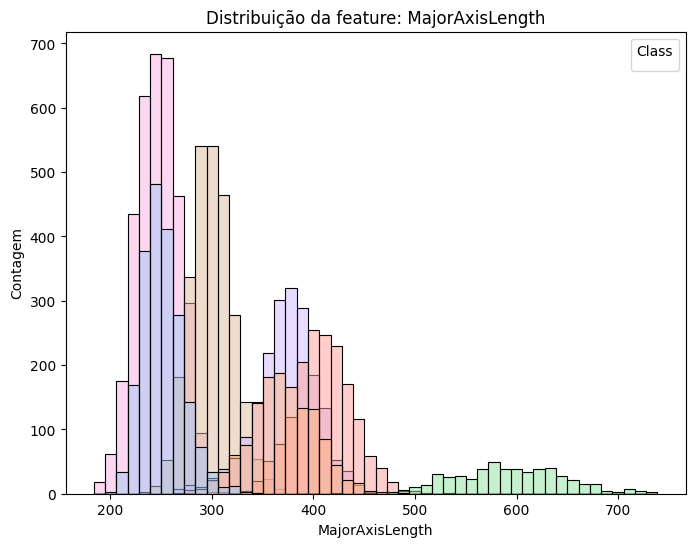

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


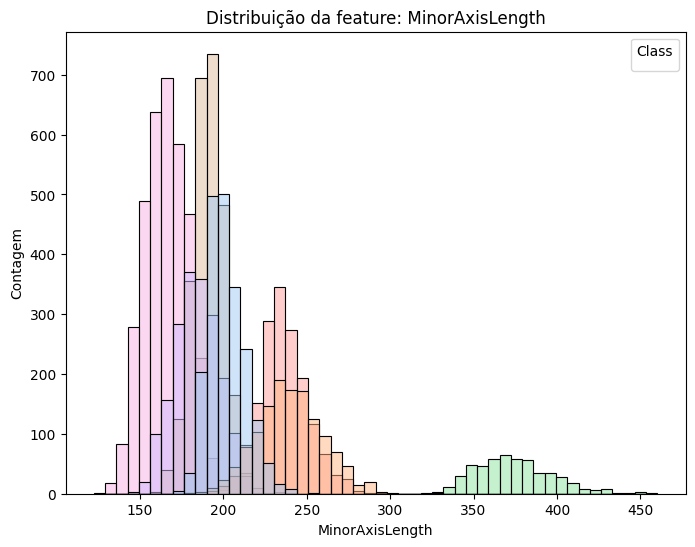

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


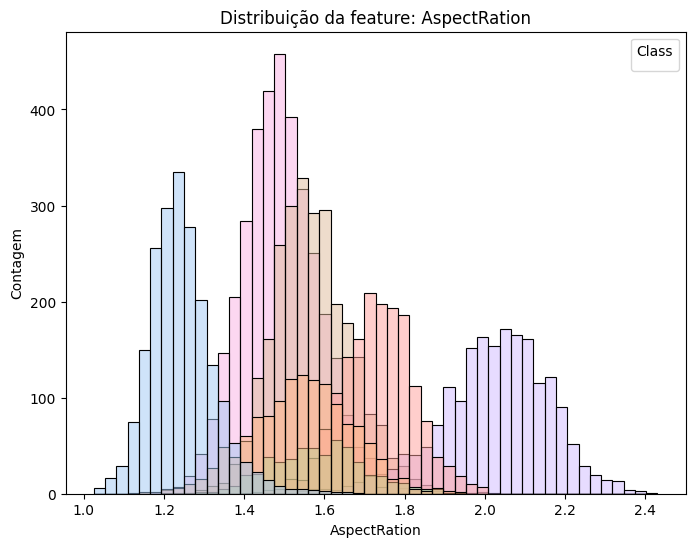

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


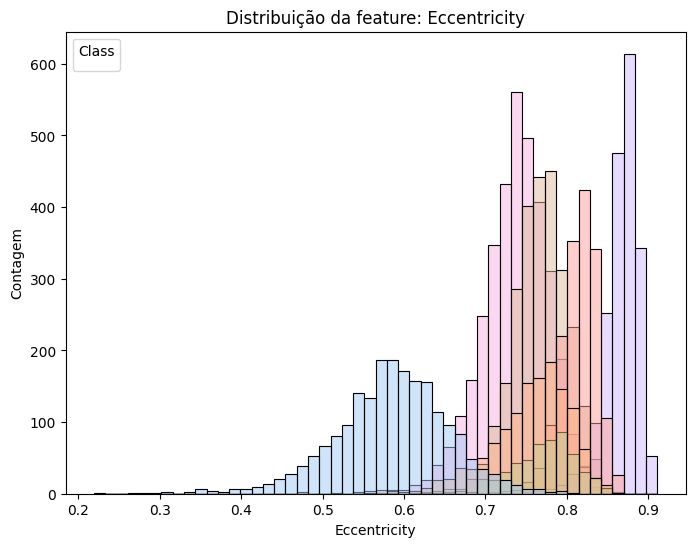

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


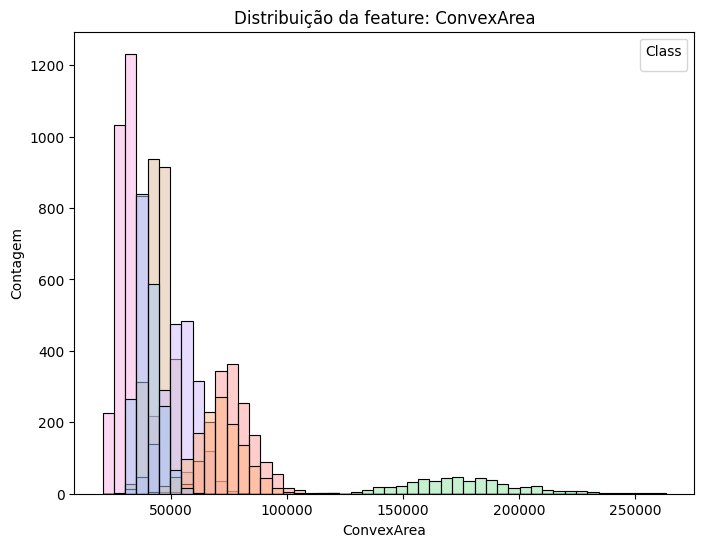

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


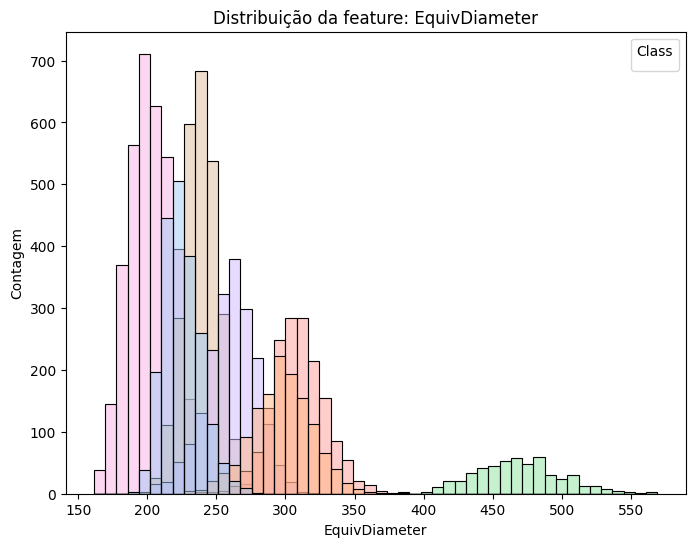

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


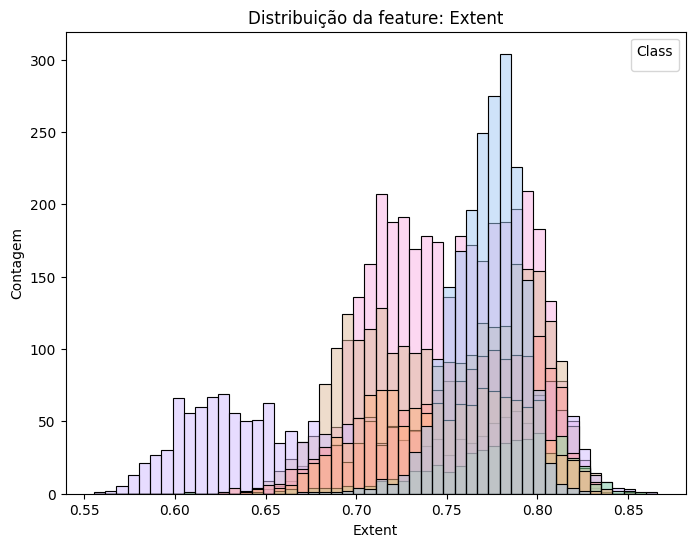

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


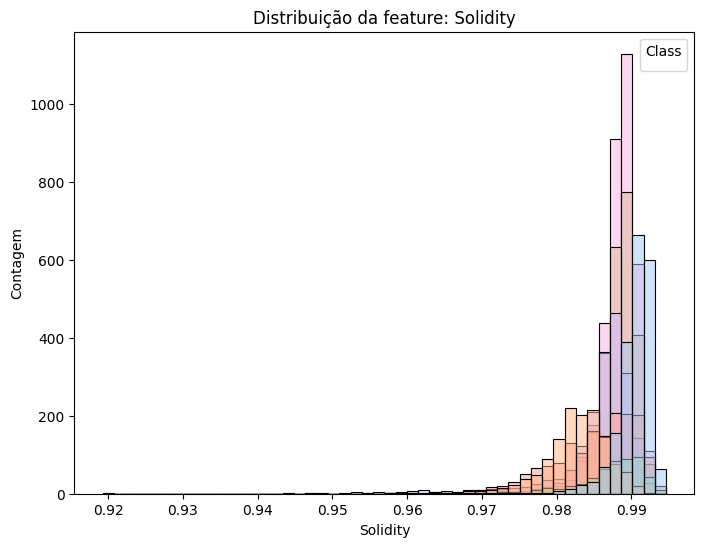

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


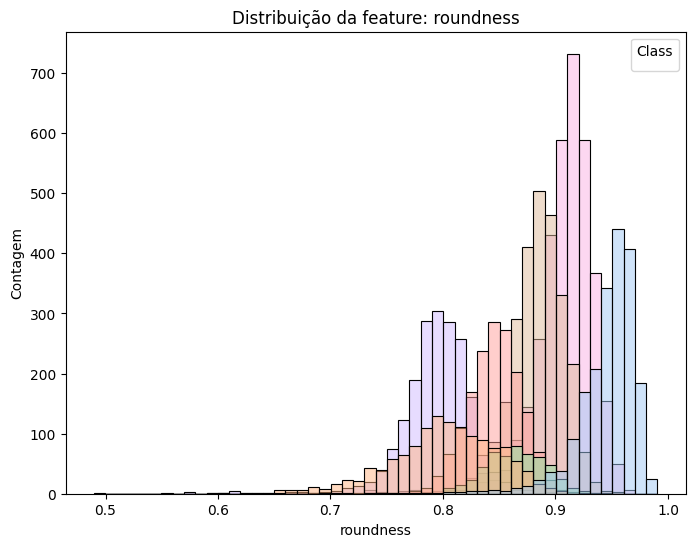

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


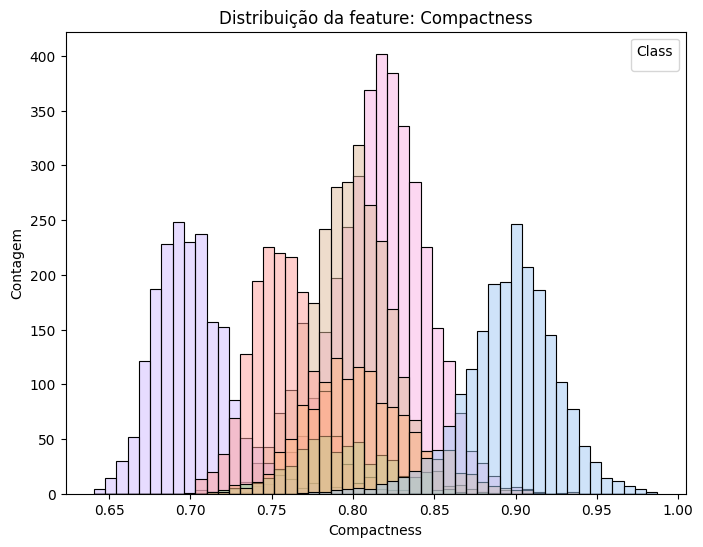

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


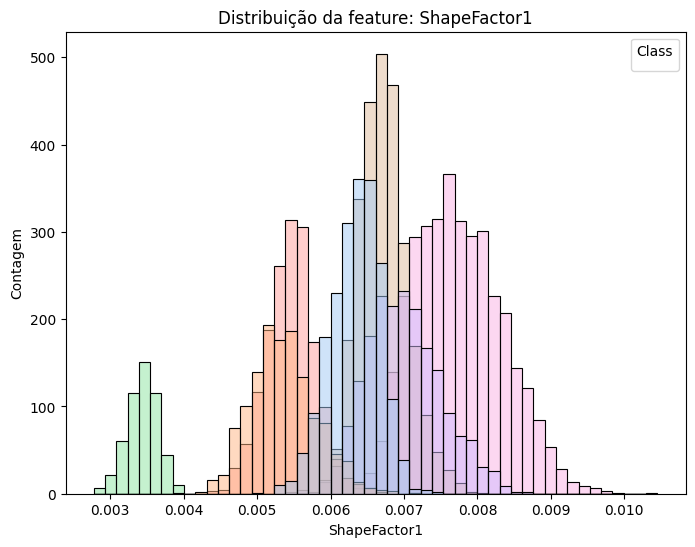

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


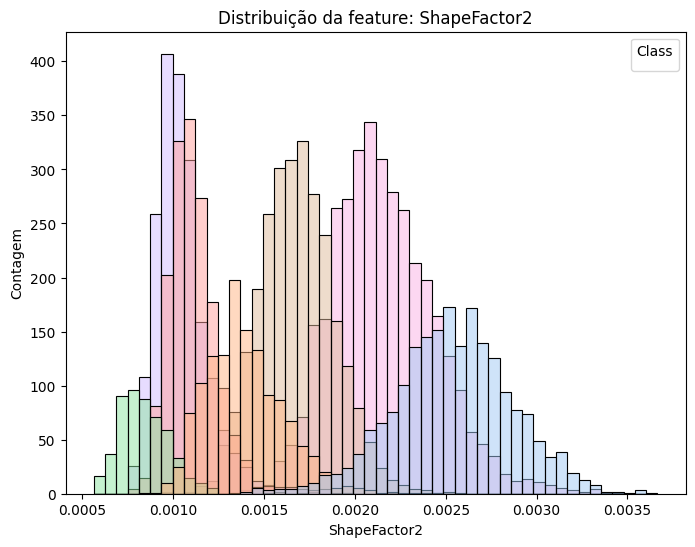

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


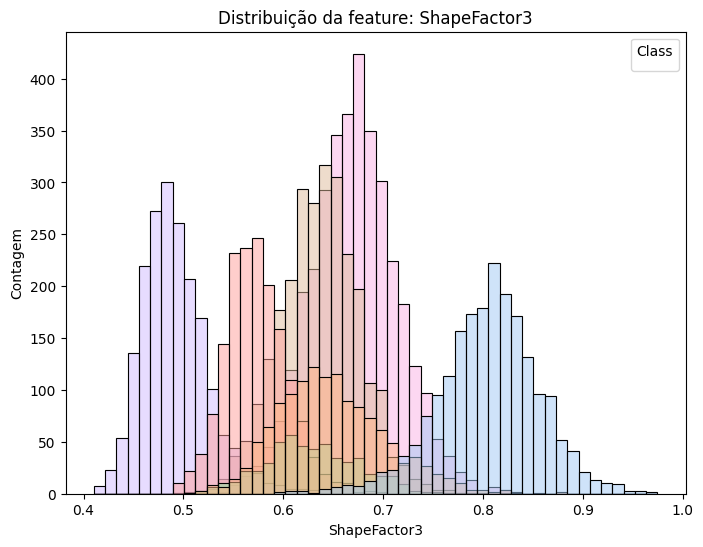

<ipython-input-6-91c86f2528ad>:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Class")


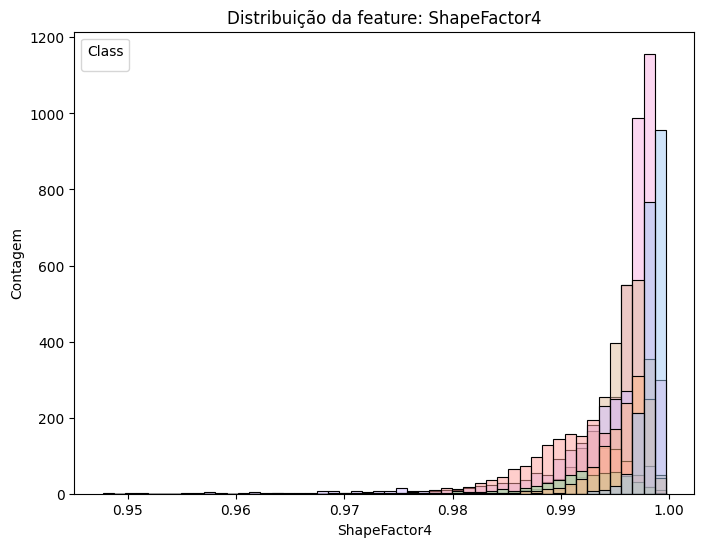

In [ ]:
features = df.select_dtypes(include=['number']).columns

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Class', kde=False, bins=50, palette="pastel")

    plt.xlabel(feature)
    plt.ylabel("Contagem")
    plt.title(f"Distribuição da feature: {feature}")
    plt.legend(title="Class")
    plt.show()

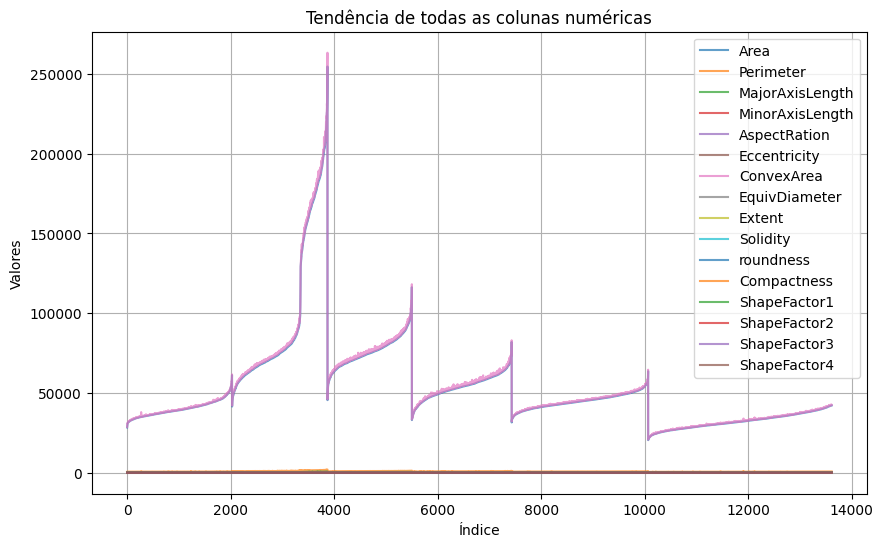

In [ ]:
colunas_numericas = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 6))
for coluna in colunas_numericas:
    plt.plot(df.index, df[coluna], label=coluna, alpha=0.7)

plt.title('Tendência de todas as colunas numéricas')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()

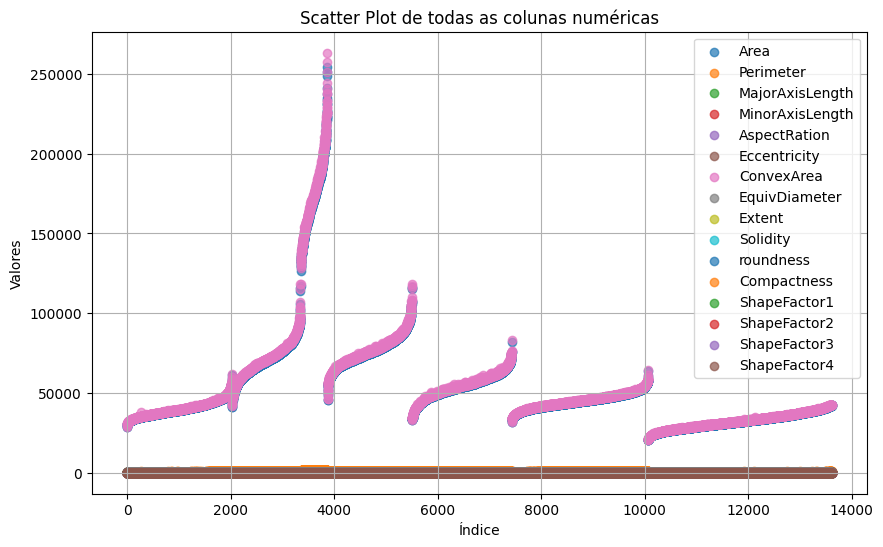

In [ ]:
colunas_numericas = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 6))

for coluna in colunas_numericas:
    plt.scatter(df.index, df[coluna], label=coluna, alpha=0.7)

plt.title('Scatter Plot de todas as colunas numéricas')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Boxplot do DataFrame completo')

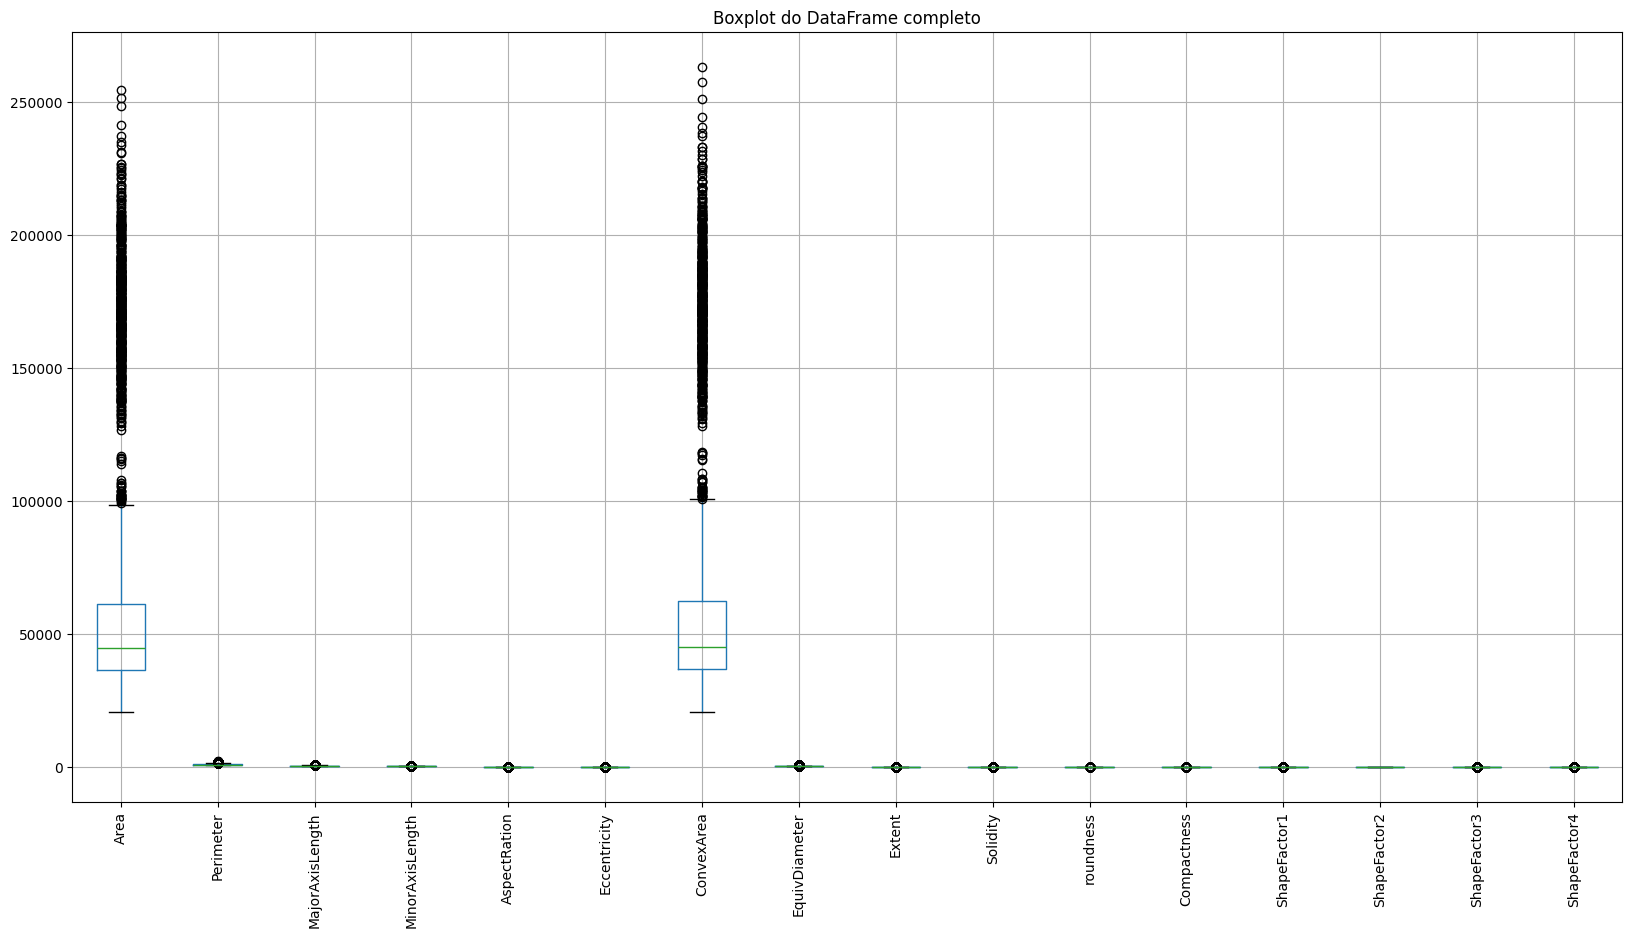

In [ ]:
plt.figure(figsize=(20, 10))
df.iloc[:, :-1].boxplot(rot=90)
plt.title('Boxplot do DataFrame completo')  # Título do gráfico

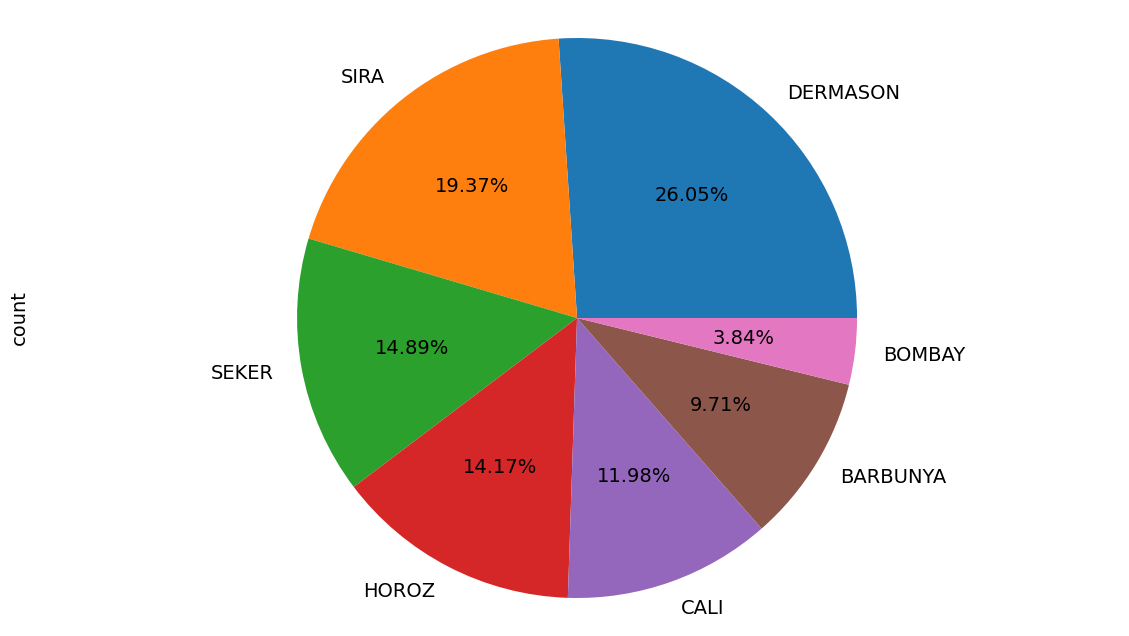

 Target Result 
 Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64 




In [ ]:
plt.figure(figsize=(14,8))
plt.rc('font', size=14)
df['Class'].value_counts().plot(kind = 'pie',autopct='%1.2f%%')
plt.axis('equal')
plt.show()
print(" Target Result \n",df['Class'].value_counts(),"\n\n")

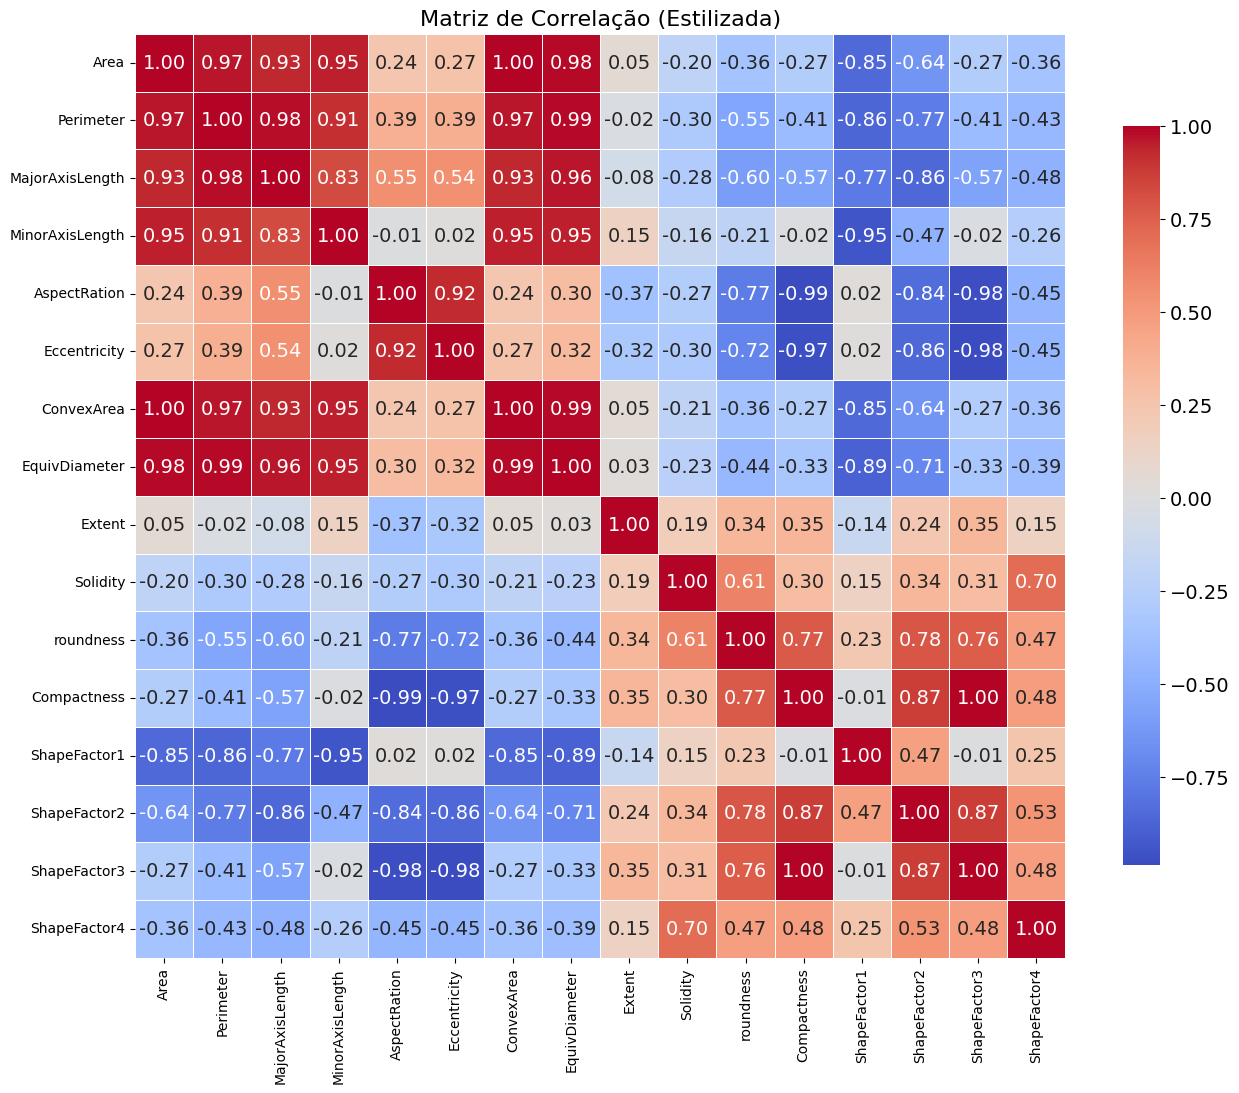

In [ ]:
corr = df.iloc[:, :-1].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("Matriz de Correlação (Estilizada)", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [ ]:
limite_corr = 0.7
correlacoes_acima_do_limite = corr.abs() > limite_corr

pares_correlacionados = np.where(np.triu(correlacoes_acima_do_limite, k=1))
pares_correlacionados_list = [(corr.index[i], corr.columns[j]) for i, j in zip(*pares_correlacionados)]

colunas_para_excluir = set()
for par in pares_correlacionados_list:
    colunas_para_excluir.add(par[1]) 

df_reduzido = df.drop(columns=colunas_para_excluir)

print("Colunas excluídas:", colunas_para_excluir)
print("DataFrame resultante:")
print(df_reduzido)

Colunas excluídas: {'ConvexArea', 'ShapeFactor4', 'Eccentricity', 'ShapeFactor2', 'Perimeter', 'MajorAxisLength', 'EquivDiameter', 'ShapeFactor3', 'MinorAxisLength', 'ShapeFactor1', 'roundness', 'Compactness'}
DataFrame resultante:
        Area  AspectRation    Extent  Solidity     Class
0      28395      1.197191  0.763923  0.988856     SEKER
1      28734      1.097356  0.783968  0.984986     SEKER
2      29380      1.209713  0.778113  0.989559     SEKER
3      30008      1.153638  0.782681  0.976696     SEKER
4      30140      1.060798  0.773098  0.990893     SEKER
...      ...           ...       ...       ...       ...
13606  42097      1.552728  0.714574  0.990331  DERMASON
13607  42101      1.476439  0.799943  0.990752  DERMASON
13608  42139      1.472582  0.729932  0.989899  DERMASON
13609  42147      1.489326  0.705389  0.987813  DERMASON
13610  42159      1.619841  0.788962  0.989648  DERMASON

[13611 rows x 5 columns]


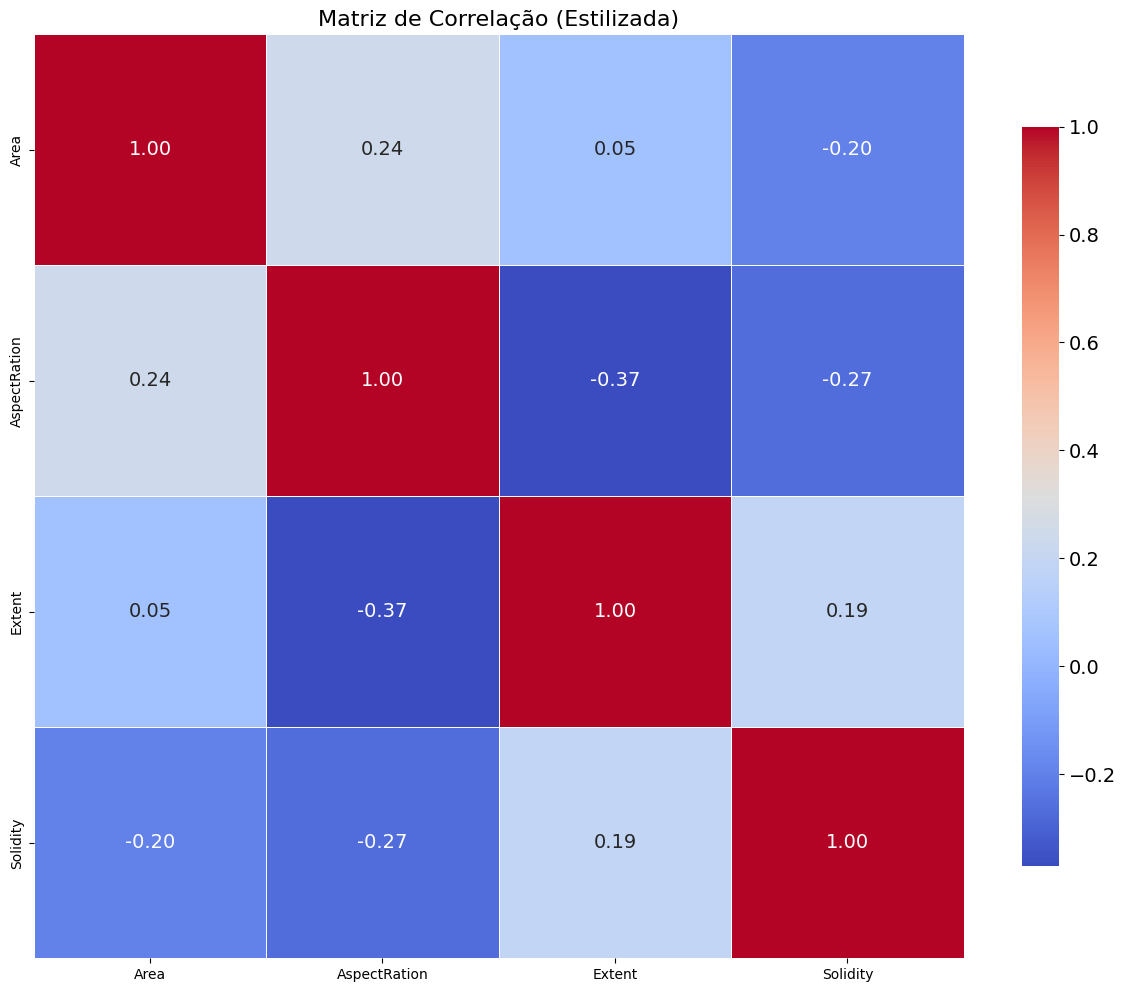

In [ ]:
corr = df_reduzido.iloc[:, :-1].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("Matriz de Correlação (Estilizada)", fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

print(kf)

KFold(n_splits=10, random_state=42, shuffle=True)


In [ ]:
import xgboost as xgb

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
}

param_grid_dt = {
    'max_depth': [10, 40, 70, 100],
    'min_samples_split': [2, 5, 10, 15, 20]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 40, 70, 100],
    'min_samples_split': [2, 5]
}


param_grid_svm = {
    'C': [0.1, 1, 10, 100, 500],
    'kernel': ['rbf', 'poly']
}


param_grid_XGB = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 40, 70, 100],
}



print("Grids de hiperparâmetros configuradas com sucesso!")


Grids de hiperparâmetros configuradas com sucesso!


In [ ]:
colunas_categoricas = ["Class"]

encoder = OneHotEncoder(sparse_output=False)

df_encoded = pd.DataFrame(encoder.fit_transform(df_reduzido[colunas_categoricas]), columns=encoder.get_feature_names_out(colunas_categoricas))

df_reduzido_encoded = pd.concat([df_reduzido.drop(columns=colunas_categoricas), df_encoded], axis=1)


X = df_reduzido_encoded.drop(["Class_BARBUNYA", "Class_BOMBAY", "Class_CALI", 	"Class_DERMASON", 	"Class_HOROZ", "Class_SEKER",	"Class_SIRA"],axis = 1)
Y = df_reduzido_encoded[["Class_BARBUNYA", "Class_BOMBAY", "Class_CALI", 	"Class_DERMASON", 	"Class_HOROZ", "Class_SEKER",	"Class_SIRA"]]

In [ ]:
Y.head()

,Class_BARBUNYA,Class_BOMBAY,Class_CALI,Class_DERMASON,Class_HOROZ,Class_SEKER,Class_SIRA
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
!pip install xgboost
from xgboost import XGBClassifier


In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11, 15], 'metric': ['euclidean', 'manhattan','minkowski','cosine']}

param_grid_dt = {
    'max_depth': [10, 40, 70, 100],
    'min_samples_split': [2, 5, 10, 15, 20]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 40, 70, 100],
    'min_samples_split': [2, 5]
}


param_grid_svm = {
    'C': [0.1, 1, 10, 100, 500],
    'kernel': ['rbf', 'poly']
}

param_grid_XGB = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 40, 70, 100],
}


knn_acc_test_scores = []
knn_precision_test_scores = []
knn_recall_test_scores = []
knn_f1_test_scores = []

dt_acc_test_scores = []
dt_precision_test_scores = []
dt_recall_test_scores = []
dt_f1_test_scores = []

rf_acc_test_scores = []
rf_precision_test_scores = []
rf_recall_test_scores = []
rf_f1_test_scores = []

svm_acc_test_scores = []
svm_precision_test_scores = []
svm_recall_test_scores = []
svm_f1_test_scores = []

xgb_acc_test_scores = []
xgb_precision_test_scores = []
xgb_recall_test_scores = []
xgb_f1_test_scores = []

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    X_trainDivided, X_val, y_trainDivided, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42, stratify=y_train)

    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)
    y_trainDivided = np.argmax(y_trainDivided, axis=1)
    y_val = np.argmax(y_val, axis=1)


    # normalização
    scaler = StandardScaler()
    X_trainDivided = scaler.fit_transform(X_trainDivided)
    X_val = scaler.transform(X_val)

    # Treinar com o conjunto completo
    scaler_full = StandardScaler()
    X_train = scaler_full.fit_transform(X_train)
    X_test = scaler_full.transform(X_test)

    f1s_val = []

    par = []

    # KNN
    for params in ParameterGrid(param_grid_knn):
        knn = KNeighborsClassifier(n_neighbors=params['n_neighbors'], metric=params['metric'])
        knn.fit(X_trainDivided,y_trainDivided)
        y_pred = knn.predict(X_val)
        acc = accuracy_score(y_val, y_pred)

        f1s_val.append(acc)
        par.append(params)

    best_knn_params = par[f1s_val.index(max(f1s_val))]
    print("Best KNN params:", best_knn_params)

    knn_best = KNeighborsClassifier(metric = best_knn_params['metric'], n_neighbors = best_knn_params['n_neighbors'])
    knn_best.fit(X_train, y_train)

    y_pred = knn_best.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    knn_acc_test_scores.append(acc)
    knn_precision_test_scores.append(precision)
    knn_recall_test_scores.append(recall)
    knn_f1_test_scores.append(f1)

    ########################################### DT ############################################################
    par = []
    f1s_val = []
    for params in ParameterGrid(param_grid_dt):
        dt = DecisionTreeClassifier(max_depth=params['max_depth'], min_samples_split=params['min_samples_split'], random_state=42)
        dt.fit(X_trainDivided,y_trainDivided)
        y_pred = dt.predict(X_val)

        acc = accuracy_score(y_val, y_pred)

        f1s_val.append(acc)
        par.append(params)

    best_dt_params = par[f1s_val.index(max(f1s_val))]
    print("Best DT params:", best_dt_params)

    dt_best = DecisionTreeClassifier(max_depth = best_dt_params['max_depth'], min_samples_split = best_dt_params['min_samples_split'], random_state=42)
    dt_best.fit(X_train, y_train)

    y_pred = dt_best.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    dt_acc_test_scores.append(acc)
    dt_precision_test_scores.append(precision)
    dt_recall_test_scores.append(recall)
    dt_f1_test_scores.append(f1)

    ########################################### RF ############################################################
    par = []
    f1s_val = []
    for params in ParameterGrid(param_grid_rf):
        rf = RandomForestClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'], random_state=42)
        rf.fit(X_trainDivided,y_trainDivided)
        y_pred = rf.predict(X_val)

        acc = accuracy_score(y_val, y_pred)

        f1s_val.append(acc)
        par.append(params)

    best_rf_params = par[f1s_val.index(max(f1s_val))]
    print("Best RF params:", best_rf_params)

    rf_best = RandomForestClassifier(n_estimators = best_rf_params['n_estimators'], max_depth = best_rf_params['max_depth'], random_state=42)

    rf_best.fit(X_train, y_train)

    y_pred = rf_best.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    rf_acc_test_scores.append(acc)
    rf_precision_test_scores.append(precision)
    rf_recall_test_scores.append(recall)
    rf_f1_test_scores.append(f1)

 ########################################### SVM ############################################################
    par = []
    f1s_val = []
    for params in ParameterGrid(param_grid_svm):
        svm = SVC(C=params['C'], kernel=params['kernel'], random_state=42)
        svm.fit(X_trainDivided,y_trainDivided)
        y_pred = svm.predict(X_val)

        acc = accuracy_score(y_val, y_pred)

        f1s_val.append(acc)
        par.append(params)
    best_svm_params = par[f1s_val.index(max(f1s_val))]
    print("Best SVM params:", best_svm_params)

    svm_best = SVC(C = best_svm_params['C'], kernel = best_svm_params['kernel'], random_state=42)

    svm_best.fit(X_train, y_train)

    y_pred = svm_best.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    svm_acc_test_scores.append(acc)
    svm_precision_test_scores.append(precision)
    svm_recall_test_scores.append(recall)
    svm_f1_test_scores.append(f1)

############################## XGB ##############################
    par = []
    f1s_val = []
    for params in ParameterGrid(param_grid_XGB):
        xgb = XGBClassifier(n_estimators=params['n_estimators'], max_depth=params['max_depth'], random_state=42)
        xgb.fit(X_trainDivided, y_trainDivided)
        y_pred = xgb.predict(X_val)
        f1 = f1_score(y_val, y_pred, average='weighted')

        f1s_val.append(f1)
        par.append(params)

    best_xgb_params = par[f1s_val.index(max(f1s_val))]
    print("Best XGB params:", best_xgb_params)

    xgb_best = XGBClassifier(n_estimators=best_xgb_params['n_estimators'], max_depth=best_xgb_params['max_depth'], random_state=42)
    xgb_best.fit(X_train, y_train)

    y_pred = xgb_best.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    xgb_acc_test_scores.append(acc)
    xgb_precision_test_scores.append(precision)
    xgb_recall_test_scores.append(recall)
    xgb_f1_test_scores.append(f1)


print(f"Acurácia média do knn nos conjuntos de testes: {sum(knn_acc_test_scores) / len(knn_acc_test_scores):.4f}")
print(f"Precision média do knn nos conjuntos de testes: {sum(knn_precision_test_scores) / len(knn_precision_test_scores):.4f}")
print(f"Recall média do knn nos conjuntos de testes: {sum(knn_recall_test_scores) / len(knn_recall_test_scores):.4f}")
print(f"F1 média do knn nos conjuntos de testes: {sum(knn_f1_test_scores) / len(knn_f1_test_scores):.4f}")
print("\n")

print(f"Acurácia média do dt nos conjuntos de testes: {sum(dt_acc_test_scores) / len(dt_acc_test_scores):.4f}")
print(f"Precision média do dt nos conjuntos de testes: {sum(dt_precision_test_scores) / len(dt_precision_test_scores):.4f}")
print(f"Recall média do dt nos conjuntos de testes: {sum(dt_recall_test_scores) / len(dt_recall_test_scores):.4f}")
print(f"F1 média do dt nos conjuntos de testes: {sum(dt_f1_test_scores) / len(dt_f1_test_scores):.4f}")
print("\n")

print(f"Acurácia média do rf nos conjuntos de testes: {sum(rf_acc_test_scores) / len(rf_acc_test_scores):.4f}")
print(f"Precision média do rf nos conjuntos de testes: {sum(rf_precision_test_scores) / len(rf_precision_test_scores):.4f}")
print(f"Recall média do rf nos conjuntos de testes: {sum(rf_recall_test_scores) / len(rf_recall_test_scores):.4f}")
print(f"F1 média do rf nos conjuntos de testes: {sum(rf_f1_test_scores) / len(rf_f1_test_scores):.4f}")
print("\n")

print(f"Acurácia média do svm nos conjuntos de testes: {sum(svm_acc_test_scores) / len(svm_acc_test_scores):.4f}")
print(f"Precision média do svm nos conjuntos de testes: {sum(svm_precision_test_scores) / len(svm_precision_test_scores):.4f}")
print(f"Recall média do svm nos conjuntos de testes: {sum(svm_recall_test_scores) / len(svm_recall_test_scores):.4f}")
print(f"F1 média do svm nos conjuntos de testes: {sum(svm_f1_test_scores) / len(svm_f1_test_scores):.4f}")
print("\n")

print(f"Acurácia média do xgb nos conjuntos de testes: {sum(xgb_acc_test_scores) / len(xgb_acc_test_scores):.4f}")
print(f"Precision média do xgb nos conjuntos de testes: {sum(xgb_precision_test_scores) / len(xgb_precision_test_scores):.4f}")
print(f"Recall média do xgb nos conjuntos de testes: {sum(xgb_recall_test_scores) / len(xgb_recall_test_scores):.4f}")
print(f"F1 média do xgb nos conjuntos de testes: {sum(xgb_f1_test_scores) / len(xgb_f1_test_scores):.4f}")


Best KNN params: {'metric': 'manhattan', 'n_neighbors': 15}
Best DT params: {'max_depth': 10, 'min_samples_split': 20}
Best RF params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best SVM params: {'C': 100, 'kernel': 'rbf'}
Best XGB params: {'max_depth': 40, 'n_estimators': 100}
Best KNN params: {'metric': 'euclidean', 'n_neighbors': 15}
Best DT params: {'max_depth': 10, 'min_samples_split': 20}
Best RF params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best SVM params: {'C': 10, 'kernel': 'rbf'}
Best XGB params: {'max_depth': 10, 'n_estimators': 50}
Best KNN params: {'metric': 'manhattan', 'n_neighbors': 11}
Best DT params: {'max_depth': 10, 'min_samples_split': 20}
Best RF params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best SVM params: {'C': 1, 'kernel': 'rbf'}
Best XGB params: {'max_depth': 10, 'n_estimators': 50}
Best KNN params: {'metric': 'euclidean', 'n_neighbors': 15}
Best DT params: {'max_depth': 10, 'min_samples_sp

In [ ]:
desvio_acuracia_KNN = np.std(knn_acc_test_scores)
desvio_precisao_KNN = np.std(knn_precision_test_scores)
desvio_recall_KNN = np.std(knn_recall_test_scores)
desvio_f1_KNN = np.std(knn_f1_test_scores)

print("-----KNN-----")
print("Desvio padrão da Acurácia:", desvio_acuracia_KNN)
print("Desvio padrão da Precisão:", desvio_precisao_KNN)
print("Desvio padrão do Recall:", desvio_recall_KNN)
print("Desvio padrão do F1-score:", desvio_f1_KNN)

-----KNN-----
Desvio padrão da Acurácia: 0.008106100497965535
Desvio padrão da Precisão: 0.008686019142868286
Desvio padrão do Recall: 0.008106100497965535
Desvio padrão do F1-score: 0.008235426795931002


In [ ]:
desvio_acuracia_DT = np.std(dt_acc_test_scores)
desvio_precisao_DT = np.std(dt_precision_test_scores)
desvio_recall_DT = np.std(dt_recall_test_scores)
desvio_f1_DT = np.std(dt_f1_test_scores)

print("-----DT-----")
print("Desvio padrão da Acurácia:", desvio_acuracia_DT)
print("Desvio padrão da Precisão:", desvio_precisao_DT)
print("Desvio padrão do Recall:", desvio_recall_DT)
print("Desvio padrão do F1-score:", desvio_f1_DT)

-----DT-----
Desvio padrão da Acurácia: 0.004543123030605256
Desvio padrão da Precisão: 0.0047020616844386165
Desvio padrão do Recall: 0.004543123030605256
Desvio padrão do F1-score: 0.004967477513145235


In [ ]:
desvio_acuracia_RF = np.std(rf_acc_test_scores)
desvio_precisao_RF = np.std(rf_precision_test_scores)
desvio_recall_RF = np.std(rf_recall_test_scores)
desvio_f1_RF = np.std(rf_f1_test_scores)

print("-----RF-----")
print("Desvio padrão da Acurácia:", desvio_acuracia_RF)
print("Desvio padrão da Precisão:", desvio_precisao_RF)
print("Desvio padrão do Recall:", desvio_recall_RF)
print("Desvio padrão do F1-score:", desvio_f1_RF)

-----RF-----
Desvio padrão da Acurácia: 0.0056450923089357485
Desvio padrão da Precisão: 0.005552943679434296
Desvio padrão do Recall: 0.0056450923089357485
Desvio padrão do F1-score: 0.005792191602567814


In [ ]:
desvio_acuracia_SVM = np.std(svm_acc_test_scores)
desvio_precisao_SVM = np.std(svm_precision_test_scores)
desvio_recall_SVM = np.std(svm_recall_test_scores)
desvio_f1_SVM = np.std(svm_f1_test_scores)

print("-----SVM-----")
print("Desvio padrão da Acurácia:", desvio_acuracia_SVM)
print("Desvio padrão da Precisão:", desvio_precisao_SVM)
print("Desvio padrão do Recall:", desvio_recall_SVM)
print("Desvio padrão do F1-score:", desvio_f1_SVM)

-----SVM-----
Desvio padrão da Acurácia: 0.006065594244532992
Desvio padrão da Precisão: 0.006344931159118636
Desvio padrão do Recall: 0.006065594244532992
Desvio padrão do F1-score: 0.006304799600554259


In [ ]:
desvio_acuracia_XGB = np.std(xgb_acc_test_scores)
desvio_precisao_XGB = np.std(xgb_precision_test_scores)
desvio_recall_XGB = np.std(xgb_recall_test_scores)
desvio_f1_XGB = np.std(xgb_f1_test_scores)

print("-----XGB-----")
print("Desvio padrão da Acurácia:", desvio_acuracia_XGB)
print("Desvio padrão da Precisão:", desvio_precisao_XGB)
print("Desvio padrão do Recall:", desvio_recall_XGB)
print("Desvio padrão do F1-score:", desvio_f1_XGB)

-----XGB-----
Desvio padrão da Acurácia: 0.006434134991340795
Desvio padrão da Precisão: 0.006357937649952966
Desvio padrão do Recall: 0.006434134991340795
Desvio padrão do F1-score: 0.006520612925895453


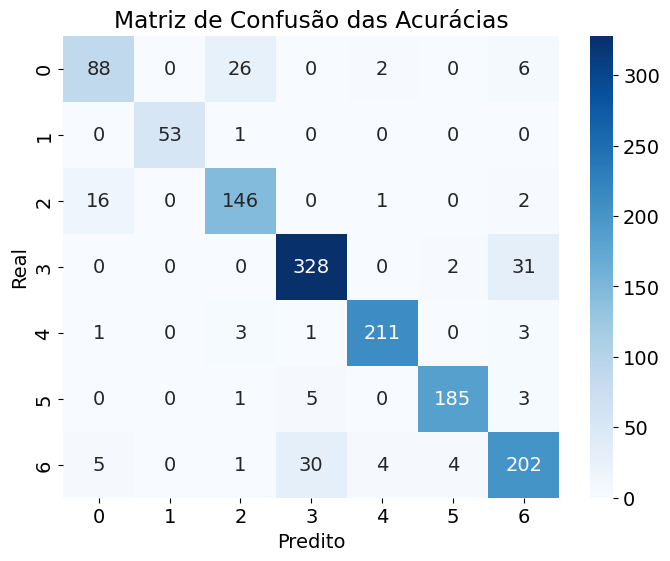

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão das Acurácias")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       122
           1       1.00      0.98      0.99        54
           2       0.82      0.88      0.85       165
           3       0.90      0.91      0.90       361
           4       0.97      0.96      0.97       219
           5       0.97      0.95      0.96       194
           6       0.82      0.82      0.82       246

    accuracy                           0.89      1361
   macro avg       0.90      0.89      0.89      1361
weighted avg       0.89      0.89      0.89      1361



In [ ]:
from os import stat
from scipy.stats import wilcoxon

#####COMPARAÇÔES######
####ACURACIA(acc)#####

stat_knn_dt, p_knn_dt_acc = wilcoxon(knn_acc_test_scores, dt_acc_test_scores)#knn e dt
print(f"Stat: {stat_knn_dt}, p-value: {p_knn_dt_acc}")

stat_knn_rf, p_knn_rf_acc = wilcoxon(knn_acc_test_scores, rf_acc_test_scores)#knn e rf
print(f"Stat: {stat_knn_rf}, p-value: {p_knn_rf_acc}")

stat_knn_svm, p_knn_svm_acc = wilcoxon(knn_acc_test_scores, svm_acc_test_scores)#knn e svm
print(f"Stat: {stat_knn_svm}, p-value: {p_knn_svm_acc}")

stat_dt_rf, p_dt_rf_acc = wilcoxon(dt_acc_test_scores, rf_acc_test_scores)#dt e rf
print(f"Stat: {stat_dt_rf}, p-value: {p_dt_rf_acc}")

stat_dt_svm, p_dt_svm_acc = wilcoxon(dt_acc_test_scores, svm_acc_test_scores)#dt e svm
print(f"Stat: {stat_dt_svm}, p-value: {p_dt_svm_acc}")

stat_rf_svm, p_rf_svm_acc = wilcoxon(rf_acc_test_scores, svm_acc_test_scores)#rf e svm
print(f"Stat: {stat_rf_svm}, p-value: {p_rf_svm_acc}")

stat_knn_xgb, p_knn_xgb_acc = wilcoxon(knn_acc_test_scores, xgb_acc_test_scores)#knn e xgb
print(f"Stat: {stat_knn_xgb}, p-value: {p_knn_xgb_acc}")

stat_dt_xgb, p_dt_xgb_acc = wilcoxon(dt_acc_test_scores, xgb_acc_test_scores)#dt e xgb
print(f"Stat: {stat_dt_xgb}, p-value: {p_dt_xgb_acc}")

stat_rf_xgb, p_rf_xgb_acc = wilcoxon(rf_acc_test_scores, xgb_acc_test_scores)#rf e xgb
print(f"Stat: {stat_rf_xgb}, p-value: {p_rf_xgb_acc}")

stat_svm_xgb, p_svm_xgb_acc = wilcoxon(svm_acc_test_scores, xgb_acc_test_scores)#svm e xgb
print(f"Stat: {stat_svm_xgb}, p-value: {p_svm_xgb_acc}")



comparacoes_acc= {
    "KNN vs DT": p_knn_dt_acc,
    "DT vs RF": p_dt_rf_acc,
    "KNN vs RF": p_knn_rf_acc,
    "KNN vs SVM": p_knn_svm_acc,
    "DT vs SVM": p_dt_svm_acc,
    "RF vs SVM": p_rf_svm_acc,
    "KNN vs XGB": p_knn_xgb_acc,
    "DT vs XGB": p_dt_xgb_acc,
    "RF vs XGB": p_rf_xgb_acc,
    "SVM vs XGB": p_svm_xgb_acc
}

print("\n")
print("ACURACIA")


for nome, p_valor in comparacoes_acc.items():
    print(f"{nome} - Estatística do teste: {p_valor}")
    if p_valor < 0.05:
        print(f"{nome}: Há diferença estatística significativa!")
    else:
        print(f"{nome}: Não há diferença estatística significativa.")

Stat: 23.5, p-value: 0.705078125
Stat: 1.5, p-value: 0.005859375
Stat: 0.0, p-value: 0.001953125
Stat: 0.0, p-value: 0.001953125
Stat: 0.0, p-value: 0.001953125
Stat: 10.5, p-value: 0.16796875
Stat: 11.5, p-value: 0.21484375
Stat: 8.0, p-value: 0.048828125
Stat: 0.0, p-value: 0.001953125
Stat: 0.0, p-value: 0.001953125


ACURACIA
KNN vs DT - Estatística do teste: 0.705078125
KNN vs DT: Não há diferença estatística significativa.
DT vs RF - Estatística do teste: 0.001953125
DT vs RF: Há diferença estatística significativa!
KNN vs RF - Estatística do teste: 0.005859375
KNN vs RF: Há diferença estatística significativa!
KNN vs SVM - Estatística do teste: 0.001953125
KNN vs SVM: Há diferença estatística significativa!
DT vs SVM - Estatística do teste: 0.001953125
DT vs SVM: Há diferença estatística significativa!
RF vs SVM - Estatística do teste: 0.16796875
RF vs SVM: Não há diferença estatística significativa.
KNN vs XGB - Estatística do teste: 0.21484375
KNN vs XGB: Não há diferença esta

In [ ]:
from scipy.stats import wilcoxon

####COMPARAÇÔES####
####PRECISION(precision)


stat_knn_dt, p_knn_dt = wilcoxon(knn_precision_test_scores, dt_precision_test_scores)#knn e dt
print(f"Stat: {stat_knn_dt}, p-value: {p_knn_dt}")

stat_knn_rf, p_knn_rf = wilcoxon(knn_precision_test_scores, rf_precision_test_scores)#knn e rf
print(f"Stat: {stat_knn_rf}, p-value: {p_knn_rf}")

stat_knn_svm, p_knn_svm = wilcoxon(knn_precision_test_scores, svm_precision_test_scores)#knn e svm
print(f"Stat: {stat_knn_svm}, p-value: {p_knn_svm}")

stat_dt_rf, p_dt_rf = wilcoxon(dt_precision_test_scores, rf_precision_test_scores)#dt e rf
print(f"Stat: {stat_dt_rf}, p-value: {p_dt_rf}")

stat_dt_svm, p_dt_svm = wilcoxon(dt_precision_test_scores, svm_precision_test_scores)#dt e svm
print(f"Stat: {stat_dt_svm}, p-value: {p_dt_svm}")

stat_rf_svm, p_rf_svm = wilcoxon(rf_precision_test_scores, svm_precision_test_scores)#rf e svm
print(f"Stat: {stat_rf_svm}, p-value: {p_rf_svm}")

stat_knn_xgb, p_knn_xgb = wilcoxon(knn_precision_test_scores, xgb_precision_test_scores)#knn e xgb
print(f"Stat: {stat_knn_xgb}, p-value: {p_knn_xgb}")

stat_dt_xgb, p_dt_xgb = wilcoxon(dt_precision_test_scores, xgb_precision_test_scores)#dt e xgb
print(f"Stat: {stat_dt_xgb}, p-value: {p_dt_xgb}")

stat_rf_xgb, p_rf_xgb = wilcoxon(rf_precision_test_scores, xgb_precision_test_scores)#rf e xgb
print(f"Stat: {stat_rf_xgb}, p-value: {p_rf_xgb}")

stat_svm_xgb, p_svm_xgb = wilcoxon(svm_precision_test_scores, xgb_precision_test_scores)#svm e xgb
print(f"Stat: {stat_svm_xgb}, p-value: {p_svm_xgb}")


comparacoes = {
    "KNN vs DT": p_knn_dt,
    "DT vs RF": p_dt_rf,
    "KNN vs RF": p_knn_rf,
    "KNN vs SVM": p_knn_svm,
    "DT vs SVM": p_dt_svm,
    "RF vs SVM": p_rf_svm,
    "KNN vs XGB": p_knn_xgb,
    "DT vs XGB": p_dt_xgb,
    "RF vs XGB": p_rf_xgb,
    "SVM vs XGB": p_svm_xgb
}

print("\n")
print("PRECISION")


for nome, p_valor in comparacoes.items():
    print(f"{nome} - Estatística do teste: {p_valor}")
    if p_valor < 0.05:
        print(f"{nome}: Há diferença estatística significativa!")
    else:
        print(f"{nome}: Não há diferença estatística significativa.")

Stat: 24.0, p-value: 0.76953125
Stat: 1.0, p-value: 0.00390625
Stat: 0.0, p-value: 0.001953125
Stat: 0.0, p-value: 0.001953125
Stat: 0.0, p-value: 0.001953125
Stat: 16.0, p-value: 0.275390625
Stat: 15.0, p-value: 0.232421875
Stat: 8.0, p-value: 0.048828125
Stat: 0.0, p-value: 0.001953125
Stat: 0.0, p-value: 0.001953125


PRECISION
KNN vs DT - Estatística do teste: 0.76953125
KNN vs DT: Não há diferença estatística significativa.
DT vs RF - Estatística do teste: 0.001953125
DT vs RF: Há diferença estatística significativa!
KNN vs RF - Estatística do teste: 0.00390625
KNN vs RF: Há diferença estatística significativa!
KNN vs SVM - Estatística do teste: 0.001953125
KNN vs SVM: Há diferença estatística significativa!
DT vs SVM - Estatística do teste: 0.001953125
DT vs SVM: Há diferença estatística significativa!
RF vs SVM - Estatística do teste: 0.275390625
RF vs SVM: Não há diferença estatística significativa.
KNN vs XGB - Estatística do teste: 0.232421875
KNN vs XGB: Não há diferença est

In [ ]:
from scipy.stats import wilcoxon

####COMPARAÇÔES####
####RECALL(recall)


stat_knn_dt, p_knn_dt = wilcoxon(knn_recall_test_scores, dt_recall_test_scores)#knn e dt
print(f"Stat: {stat_knn_dt}, p-value: {p_knn_dt}")

stat_knn_rf, p_knn_rf = wilcoxon(knn_recall_test_scores, rf_recall_test_scores)#knn e rf
print(f"Stat: {stat_knn_rf}, p-value: {p_knn_rf}")

stat_knn_svm, p_knn_svm = wilcoxon(knn_recall_test_scores, svm_recall_test_scores)#knn e svm
print(f"Stat: {stat_knn_svm}, p-value: {p_knn_svm}")

stat_dt_rf, p_dt_rf = wilcoxon(dt_recall_test_scores, rf_recall_test_scores)#dt e rf
print(f"Stat: {stat_dt_rf}, p-value: {p_dt_rf}")

stat_dt_svm, p_dt_svm = wilcoxon(dt_recall_test_scores, svm_recall_test_scores)#dt e svm
print(f"Stat: {stat_dt_svm}, p-value: {p_dt_svm}")

stat_rf_svm, p_rf_svm = wilcoxon(rf_recall_test_scores, svm_recall_test_scores)#rf e svm
print(f"Stat: {stat_rf_svm}, p-value: {p_rf_svm}")

comparacoes = {
    "KNN vs DT": p_knn_dt,
    "DT vs RF": p_dt_rf,
    "KNN vs RF": p_knn_rf,
    "KNN vs SVM": p_knn_svm,
    "DT vs SVM": p_dt_svm,
    "RF vs SVM": p_rf_svm,
    "KNN vs XGB": p_knn_xgb,
    "DT vs XGB": p_dt_xgb,
    "RF vs XGB": p_rf_xgb,
    "SVM vs XGB": p_svm_xgb
}

print("\n")
print("RECALL")


for nome, p_valor in comparacoes.items():
    print(f"{nome} - Estatística do teste: {p_valor}")
    if p_valor < 0.05:
        print(f"{nome}: Há diferença estatística significativa!")
    else:
        print(f"{nome}: Não há diferença estatística significativa.")

Stat: 23.5, p-value: 0.705078125
Stat: 1.5, p-value: 0.005859375
Stat: 0.0, p-value: 0.001953125
Stat: 0.0, p-value: 0.001953125
Stat: 0.0, p-value: 0.001953125
Stat: 10.5, p-value: 0.16796875


RECALL
KNN vs DT - Estatística do teste: 0.705078125
KNN vs DT: Não há diferença estatística significativa.
DT vs RF - Estatística do teste: 0.001953125
DT vs RF: Há diferença estatística significativa!
KNN vs RF - Estatística do teste: 0.005859375
KNN vs RF: Há diferença estatística significativa!
KNN vs SVM - Estatística do teste: 0.001953125
KNN vs SVM: Há diferença estatística significativa!
DT vs SVM - Estatística do teste: 0.001953125
DT vs SVM: Há diferença estatística significativa!
RF vs SVM - Estatística do teste: 0.16796875
RF vs SVM: Não há diferença estatística significativa.
KNN vs XGB - Estatística do teste: 0.232421875
KNN vs XGB: Não há diferença estatística significativa.
DT vs XGB - Estatística do teste: 0.048828125
DT vs XGB: Há diferença estatística significativa!
RF vs XGB

In [ ]:
from scipy.stats import wilcoxon

####COMPARAÇÔES####
####F1(f1)

stat_knn_dt, p_knn_dt = wilcoxon(knn_f1_test_scores, dt_f1_test_scores)#knn e dt
print(f"Stat: {stat_knn_dt}, p-value: {p_knn_dt}")

stat_knn_rf, p_knn_rf = wilcoxon(knn_f1_test_scores, rf_f1_test_scores)#knn e rf
print(f"Stat: {stat_knn_rf}, p-value: {p_knn_rf}")

stat_knn_svm, p_knn_svm = wilcoxon(knn_f1_test_scores, svm_f1_test_scores)#knn e svm
print(f"Stat: {stat_knn_svm}, p-value: {p_knn_svm}")

stat_dt_rf, p_dt_rf = wilcoxon(dt_f1_test_scores, rf_f1_test_scores)#dt e rf
print(f"Stat: {stat_dt_rf}, p-value: {p_dt_rf}")

stat_dt_svm, p_dt_svm = wilcoxon(dt_f1_test_scores, svm_f1_test_scores)#dt e svm
print(f"Stat: {stat_dt_svm}, p-value: {p_dt_svm}")

stat_rf_svm, p_rf_svm = wilcoxon(rf_f1_test_scores, svm_f1_test_scores)#rf e svm
print(f"Stat: {stat_rf_svm}, p-value: {p_rf_svm}")

comparacoes = {
    "KNN vs DT": p_knn_dt,
    "DT vs RF": p_dt_rf,
    "KNN vs RF": p_knn_rf,
    "KNN vs SVM": p_knn_svm,
    "DT vs SVM": p_dt_svm,
    "RF vs SVM": p_rf_svm,
    "KNN vs XGB": p_knn_xgb,
    "DT vs XGB": p_dt_xgb,
    "RF vs XGB": p_rf_xgb,
    "SVM vs XGB": p_svm_xgb
}

print("\n")
print("F1")


for nome, p_valor in comparacoes.items():
    print(f"{nome} - Estatística do teste: {p_valor}")
    if p_valor < 0.05:
        print(f"{nome}: Há diferença estatística significativa!")
    else:
        print(f"{nome}: Não há diferença estatística significativa.")

Stat: 22.0, p-value: 0.625
Stat: 1.0, p-value: 0.00390625
Stat: 0.0, p-value: 0.001953125
Stat: 0.0, p-value: 0.001953125
Stat: 0.0, p-value: 0.001953125
Stat: 16.0, p-value: 0.275390625


F1
KNN vs DT - Estatística do teste: 0.625
KNN vs DT: Não há diferença estatística significativa.
DT vs RF - Estatística do teste: 0.001953125
DT vs RF: Há diferença estatística significativa!
KNN vs RF - Estatística do teste: 0.00390625
KNN vs RF: Há diferença estatística significativa!
KNN vs SVM - Estatística do teste: 0.001953125
KNN vs SVM: Há diferença estatística significativa!
DT vs SVM - Estatística do teste: 0.001953125
DT vs SVM: Há diferença estatística significativa!
RF vs SVM - Estatística do teste: 0.275390625
RF vs SVM: Não há diferença estatística significativa.
KNN vs XGB - Estatística do teste: 0.232421875
KNN vs XGB: Não há diferença estatística significativa.
DT vs XGB - Estatística do teste: 0.048828125
DT vs XGB: Há diferença estatística significativa!
RF vs XGB - Estatística d